In [8]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import datetime
import calendar

In [9]:
df = pd.read_csv("Uber.csv")

In [10]:
df.head(5)

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [11]:
df.isnull()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1151,False,False,False,False,False,False,False
1152,False,False,False,False,False,False,False
1153,False,False,False,False,False,False,False
1154,False,False,False,False,False,False,False


In [13]:
df.isnull().value_counts()

START_DATE*  END_DATE*  CATEGORY*  START*  STOP*  MILES*  PURPOSE*
False        False      False      False   False  False   False       653
                                                          True        502
             True       True       True    True   False   True          1
dtype: int64

In [14]:
df.isnull().any()

START_DATE*    False
END_DATE*       True
CATEGORY*       True
START*          True
STOP*           True
MILES*         False
PURPOSE*        True
dtype: bool

In [15]:
df.isnull().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

In [16]:
df = df.dropna()

In [17]:
df.isnull().sum()

START_DATE*    0
END_DATE*      0
CATEGORY*      0
START*         0
STOP*          0
MILES*         0
PURPOSE*       0
dtype: int64

In [18]:
df.dtypes

START_DATE*     object
END_DATE*       object
CATEGORY*       object
START*          object
STOP*           object
MILES*         float64
PURPOSE*        object
dtype: object

In [20]:
df["START_DATE*"] = pd.to_datetime(df["START_DATE*"], format= "%m/%d/%Y %H:%M")
df["END_DATE*"] = pd.to_datetime(df["START_DATE*"], format= "%m/%d/%Y %H:%M")

In [21]:
df.dtypes

START_DATE*    datetime64[ns]
END_DATE*      datetime64[ns]
CATEGORY*              object
START*                 object
STOP*                  object
MILES*                float64
PURPOSE*               object
dtype: object

In [22]:
hour = []
day = []
dayofweek=[]
month = []
weekday = []

for x in df["START_DATE*"]:
    hour.append(x.hour)
    day.append(x.day)
    dayofweek.append(x.dayofweek)
    month.append(x.month)
    weekday.append(calendar.day_name[dayofweek[-1]])

df["HOUR"] = hour
df["DAY"] = day
df["DAY OF WEEK"] = dayofweek
df["MONTH"] = month
df["WEEKDAY"] = weekday
    

In [23]:
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,HOUR,DAY,DAY OF WEEK,MONTH,WEEKDAY
0,2016-01-01 21:11:00,2016-01-01 21:11:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,4,1,Friday
2,2016-01-02 20:25:00,2016-01-02 20:25:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,5,1,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:31:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,1,Tuesday
4,2016-01-06 14:42:00,2016-01-06 14:42:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,2,1,Wednesday
5,2016-01-06 17:15:00,2016-01-06 17:15:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,6,2,1,Wednesday


In [28]:
df["CATEGORY*"].value_counts()

Business    647
Personal      6
Name: CATEGORY*, dtype: int64

c:\users\sagar saini\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CATEGORY*', ylabel='count'>

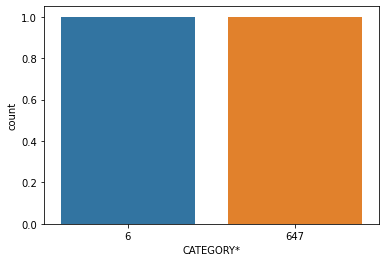

In [32]:
sns.countplot(df["CATEGORY*"].value_counts())

<AxesSubplot:ylabel='Frequency'>

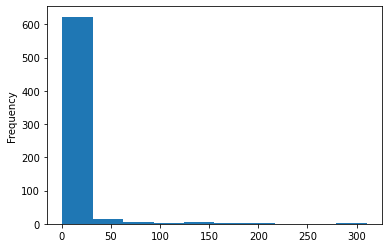

In [33]:
df["MILES*"].plot.hist()

Text(0.5, 1.0, 'Number of Trips Vs Hours')

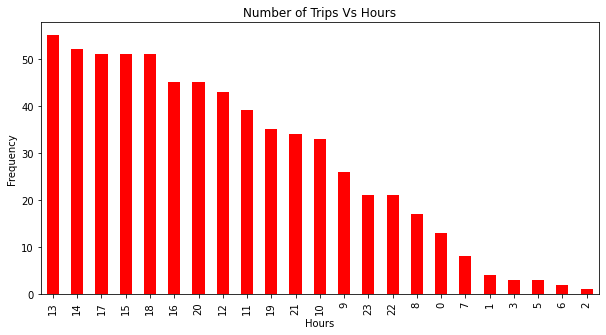

In [34]:
hours = df["START_DATE*"].dt.hour.value_counts()
hours.plot(kind = "bar", color = "red", figsize=(10,5))

plt.xlabel("Hours")
plt.ylabel("Frequency")
plt.title("Number of Trips Vs Hours")

<AxesSubplot:>

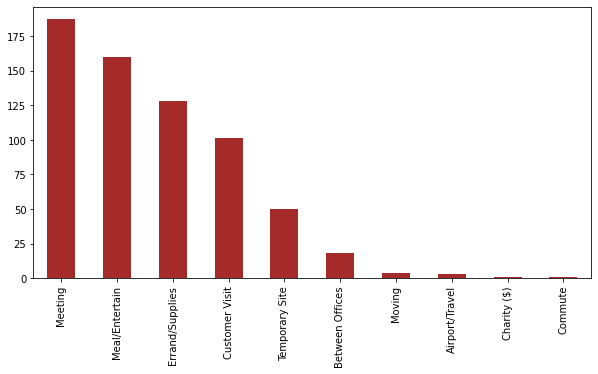

In [40]:
purpose = df["PURPOSE*"].value_counts()
purpose.plot(kind="bar", color="brown", figsize=(10,5))



<AxesSubplot:>

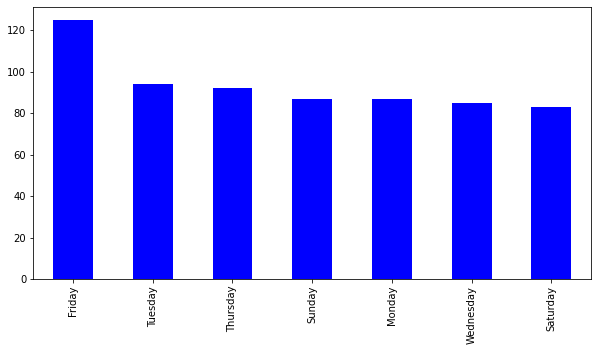

In [41]:
weeks =df["WEEKDAY"].value_counts()
weeks.plot(kind="bar", color="blue", figsize=(10,5))


<AxesSubplot:>

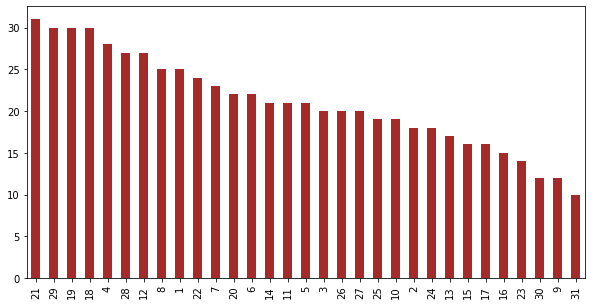

In [42]:
days =df["DAY"].value_counts()
days.plot(kind="bar", color="brown", figsize=(10,5))


<AxesSubplot:>

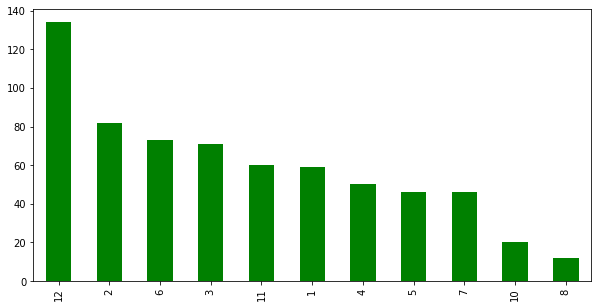

In [45]:
months =df["MONTH"].value_counts()
months.plot(kind="bar", color="green", figsize=(10,5))


<AxesSubplot:>

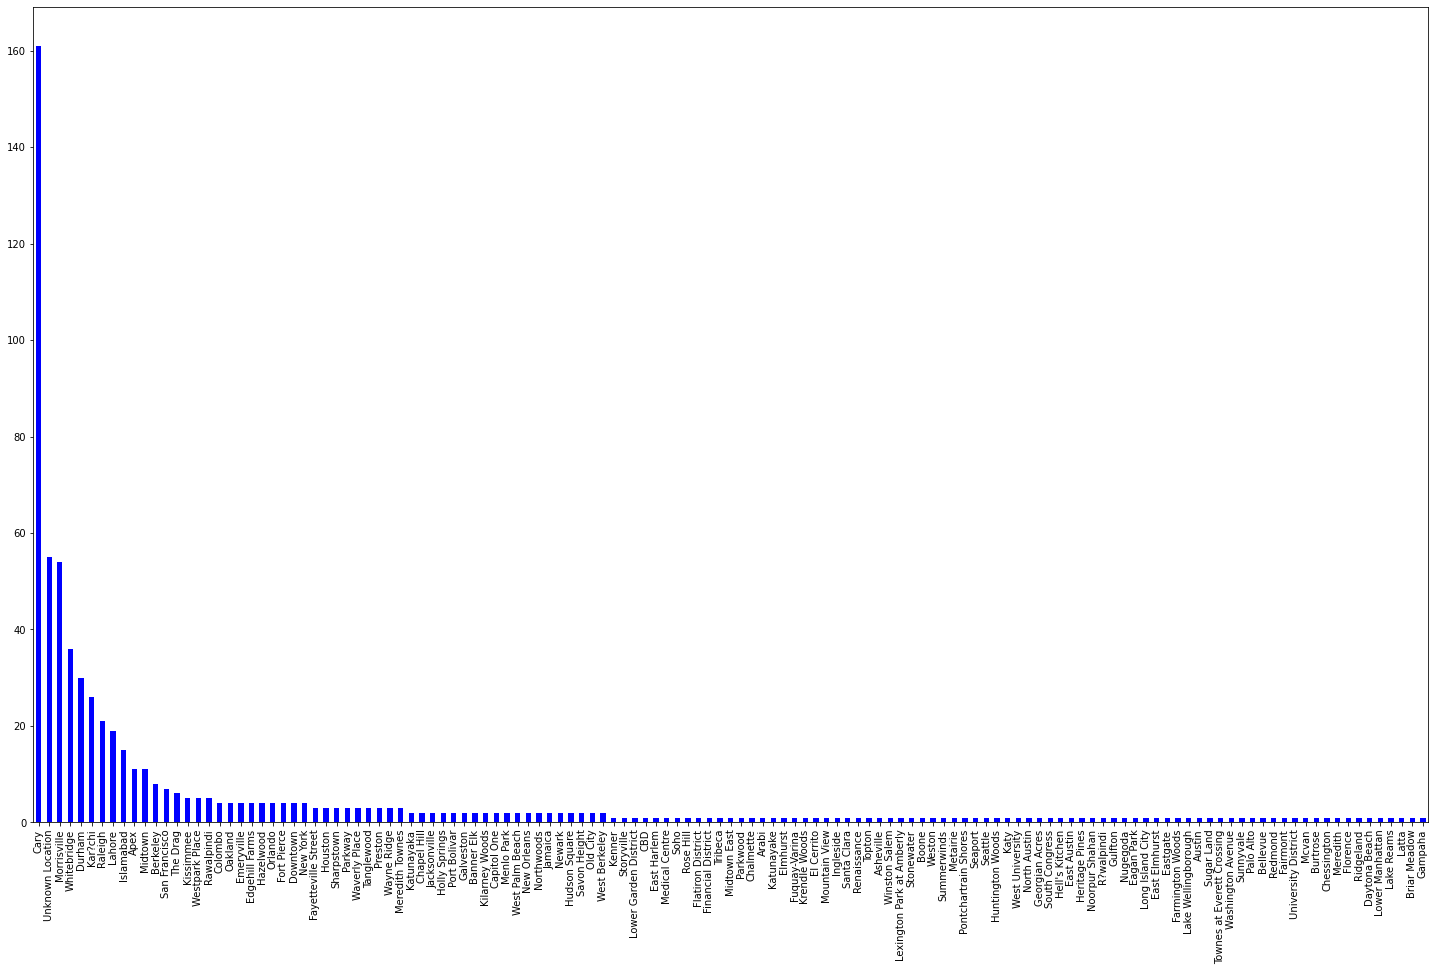

In [48]:
weeks =df["START*"].value_counts()
weeks.plot(kind="bar", color="blue", figsize=(25,15))
